## Zadanie 1: Sterownik rozmyty

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Parametry symulacji
X_ZAKRES = [-100, 100]
Y_ZAKRES = [-100, 0]
X_ZASIEG = X_ZAKRES[1] - X_ZAKRES[0]
Y_ZASIEG = Y_ZAKRES[1] - Y_ZAKRES[0]
RAMPA_X_ZASIEG = [-30, 30]
RAMPA_Y_ZASIEG = [-10, 0]
RAMPA_SRODEK = [0, 0]
RAMPA_KAT_DOCELOWY = [-20, 20]
OBROT_ZAKRES = [-20, 20]
KAT_ZAKRES = [-180, 180]
KAT_ZASIEG = KAT_ZAKRES[1] - KAT_ZAKRES[0]
RUCH_SKOK = 5.0

In [3]:
class PojazdPolozenie:
    def __init__(self):
        self.x = np.random.uniform(X_ZAKRES[0], X_ZAKRES[1])
        self.y = np.random.uniform(Y_ZAKRES[0], Y_ZAKRES[1])
        self.kat = np.random.uniform(KAT_ZAKRES[0], KAT_ZAKRES[1])

In [4]:
def zwroc_odpowiedz(polozenie):
    x = RAMPA_SRODEK[0] - polozenie.x
    y = RAMPA_SRODEK[1] - polozenie.y
    kat_docelowy = math.degrees(math.atan2(x, y))  # https://en.wikipedia.org/wiki/Atan2#/media/File:Atan2_differs_from_arctan.png
    roznica_katow = kat_docelowy - polozenie.kat
    roznica_katow = (roznica_katow + 180) % 360 - 180
    return max(OBROT_ZAKRES[0], min(OBROT_ZAKRES[1], roznica_katow))

In [5]:
def rysuj_iteracje(polozenie):
    fig, ax = plt.subplots()
    ax.grid(True)

    rampa = plt.Rectangle((RAMPA_X_ZASIEG[0], RAMPA_Y_ZASIEG[0]), RAMPA_X_ZASIEG[1] - RAMPA_X_ZASIEG[0],
                          RAMPA_Y_ZASIEG[1] - RAMPA_Y_ZASIEG[0], color='orange', alpha=0.5, label='Rampa')
    ax.add_patch(rampa)
    ax.plot(RAMPA_SRODEK[0], RAMPA_SRODEK[1], 'ro', label='Punkt docelowy')
    
    ax.plot(polozenie.x, polozenie.y, 'go', label='Ciężarówka')
    strzalka_x = RUCH_SKOK * math.sin(math.radians(polozenie.kat))
    strzalka_y = RUCH_SKOK * math.cos(math.radians(polozenie.kat))
    ax.arrow(polozenie.x, polozenie.y, strzalka_x, strzalka_y, head_width=3, head_length=3, fc='green', ec='green')

    ax.set_xlim(X_ZAKRES[0], X_ZAKRES[1])
    ax.set_ylim(Y_ZAKRES[0], Y_ZAKRES[1])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal', adjustable='box')
    plt.title('Parking')
    plt.legend()
    plt.show()

-77.50202199106408 -18.433995206423376 59.27298393138554
17.34771889156889


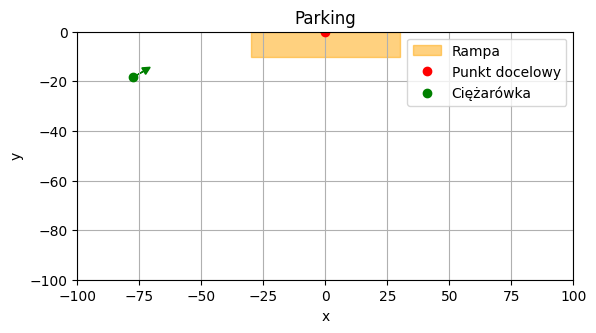

-72.63772422738317 -17.277013241892842 76.6207028229544
2.842170943040401e-14


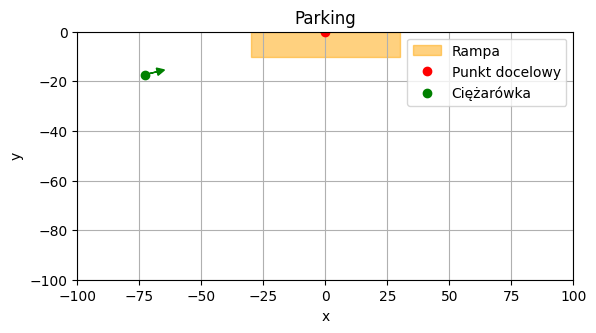

-67.77342646370226 -16.12003127736231 76.6207028229544
2.842170943040401e-14


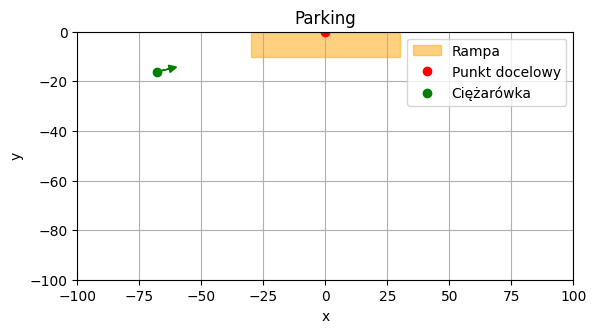

-62.909128700021355 -14.963049312831775 76.6207028229544
2.842170943040401e-14


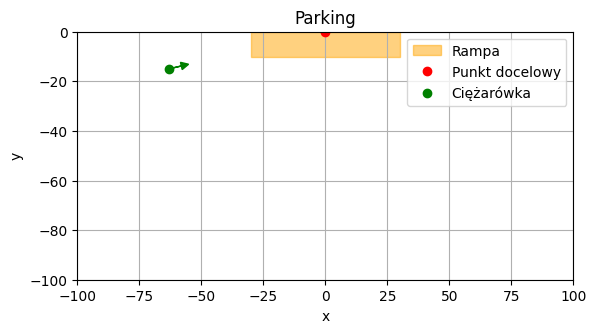

-58.044830936340446 -13.80606734830124 76.6207028229544
2.842170943040401e-14


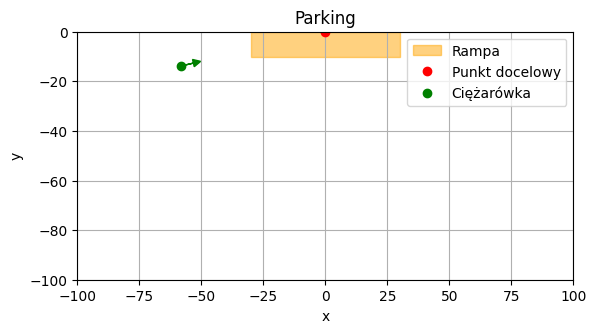

-53.18053317265954 -12.649085383770707 76.6207028229544
2.842170943040401e-14


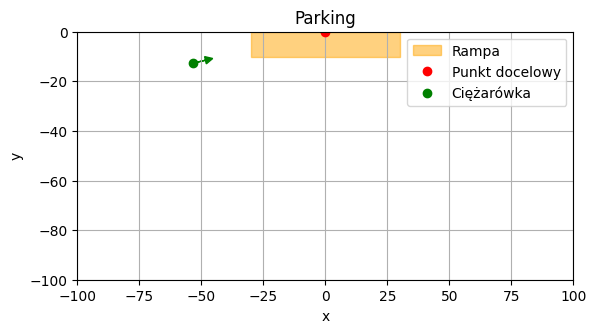

-48.31623540897863 -11.492103419240173 76.6207028229544
2.842170943040401e-14


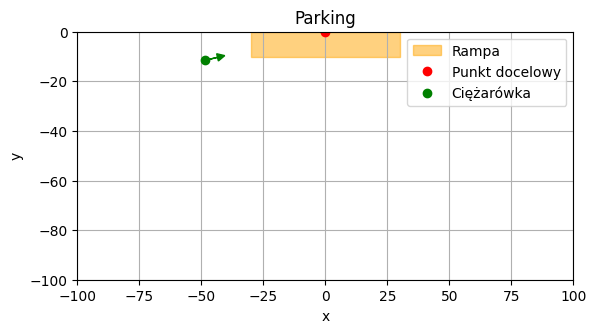

-43.45193764529772 -10.33512145470964 76.6207028229544
2.842170943040401e-14


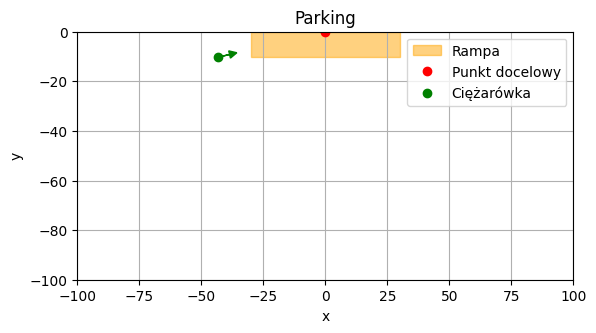

-38.58763988161681 -9.178139490179106 76.6207028229544
5.684341886080802e-14


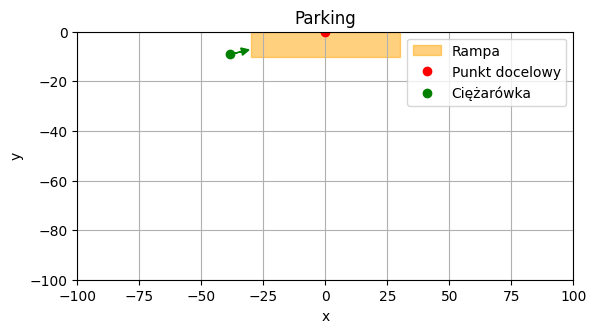

-33.7233421179359 -8.021157525648578 76.62070282295446
-2.842170943040401e-14


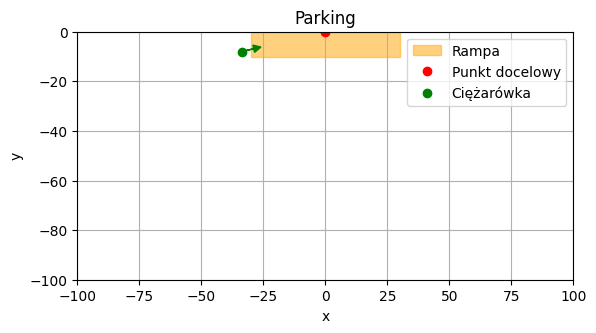

-28.859044354254994 -6.864175561118044 76.6207028229544
5.684341886080802e-14


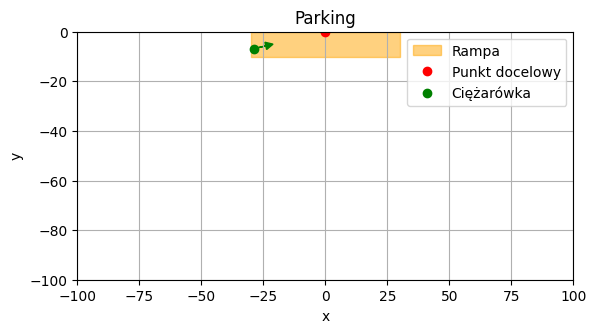

-23.99474659057409 -5.707193596587516 76.62070282295446
0.0


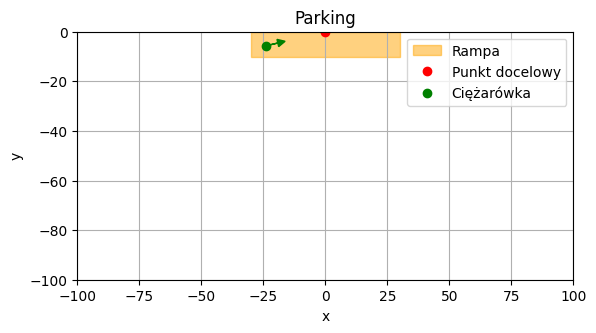

-19.13044882689318 -4.550211632056987 76.62070282295446
-2.842170943040401e-14


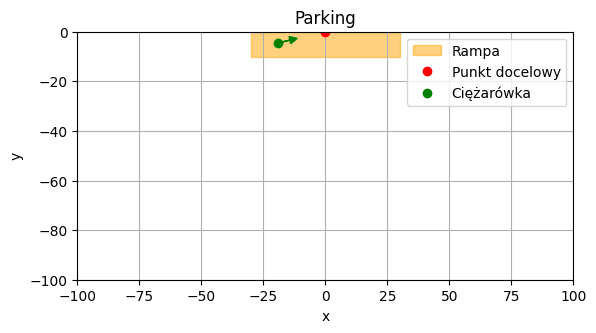

-14.266151063212273 -3.393229667526453 76.6207028229544
5.684341886080802e-14


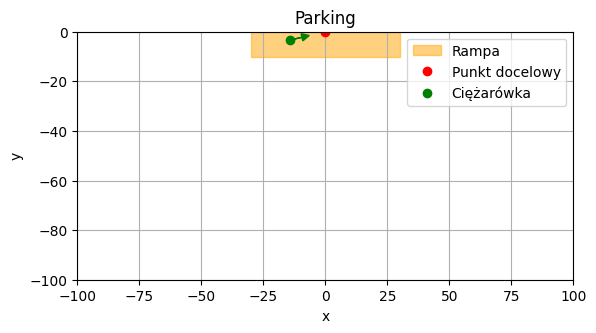

-9.401853299531366 -2.2362477029959242 76.62070282295446
0.0


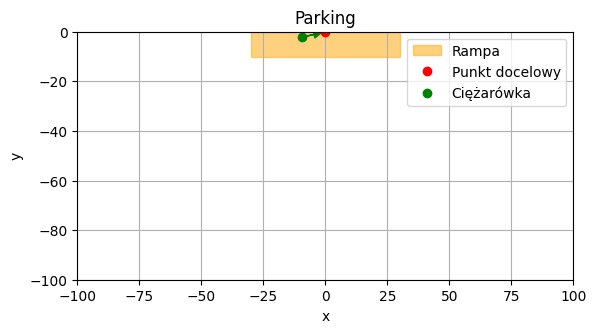

-4.5375555358504585 -1.0792657384653956 76.62070282295446
-2.842170943040401e-14


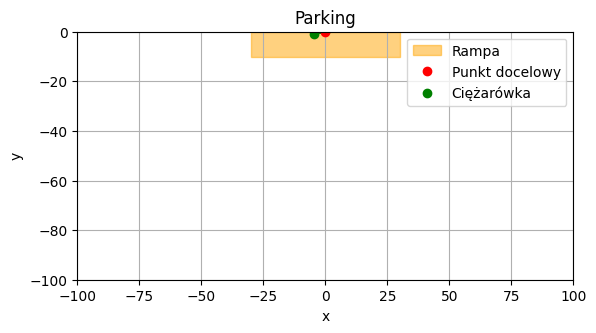

Ciężarówka wypadła z trasy!


In [6]:
pojazd = PojazdPolozenie()
while True:
    obrot = zwroc_odpowiedz(pojazd)
    print(pojazd.x, pojazd.y, pojazd.kat)
    print(obrot)
    rysuj_iteracje(pojazd)
    pojazd.kat = (pojazd.kat + obrot + 180) % 360 - 180
    pojazd.x += RUCH_SKOK * math.sin(math.radians(pojazd.kat))
    pojazd.y += RUCH_SKOK * math.cos(math.radians(pojazd.kat))

    if (RAMPA_X_ZASIEG[0] <= pojazd.x <= RAMPA_X_ZASIEG[1] and
        RAMPA_Y_ZASIEG[0] <= pojazd.y <= RAMPA_Y_ZASIEG[1] and
        RAMPA_KAT_DOCELOWY[0] <= pojazd.kat <= RAMPA_KAT_DOCELOWY[1]):
        print('Ciężarówka osiągnęła cel!')
        break
    if not (X_ZAKRES[0] <= pojazd.x <= X_ZAKRES[1] and
            Y_ZAKRES[0] <= pojazd.y <= Y_ZAKRES[1]):
        print('Ciężarówka wypadła z trasy!')
        break